In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
X = dataset.iloc[:, [3, 4]].values

In [30]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [31]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [32]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

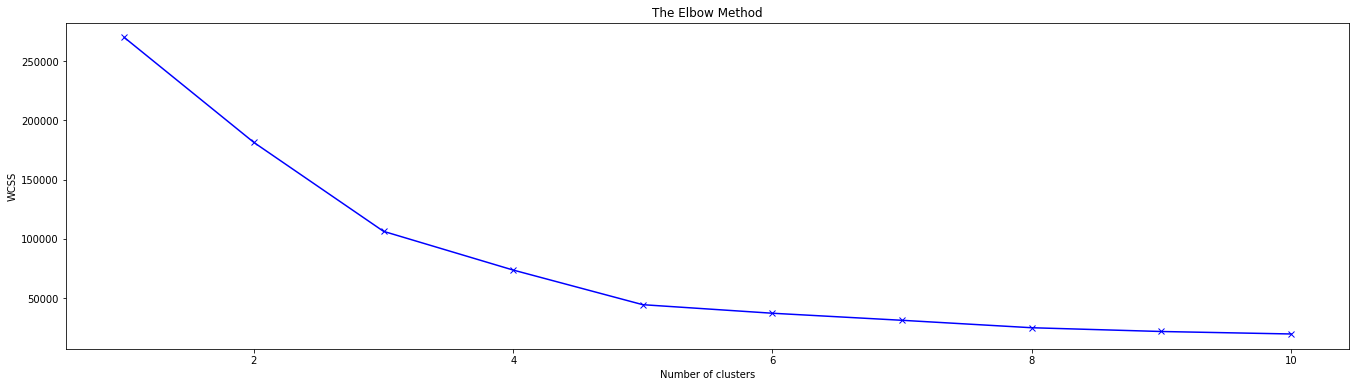

In [33]:
# The elbow method consists of plotting the explained variation 
# as a function of the number of clusters, and picking the elbow of the curve as 
# the number of clusters to use.
# 
# Fitting K-Means to the dataset
# Using the elbow method to find the optimal number of clusters
# This initializes the centroids to be (generally) distant from each other,
# leading to probably better results than random initialization.
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(23,6))
plt.plot(range(1, 11), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

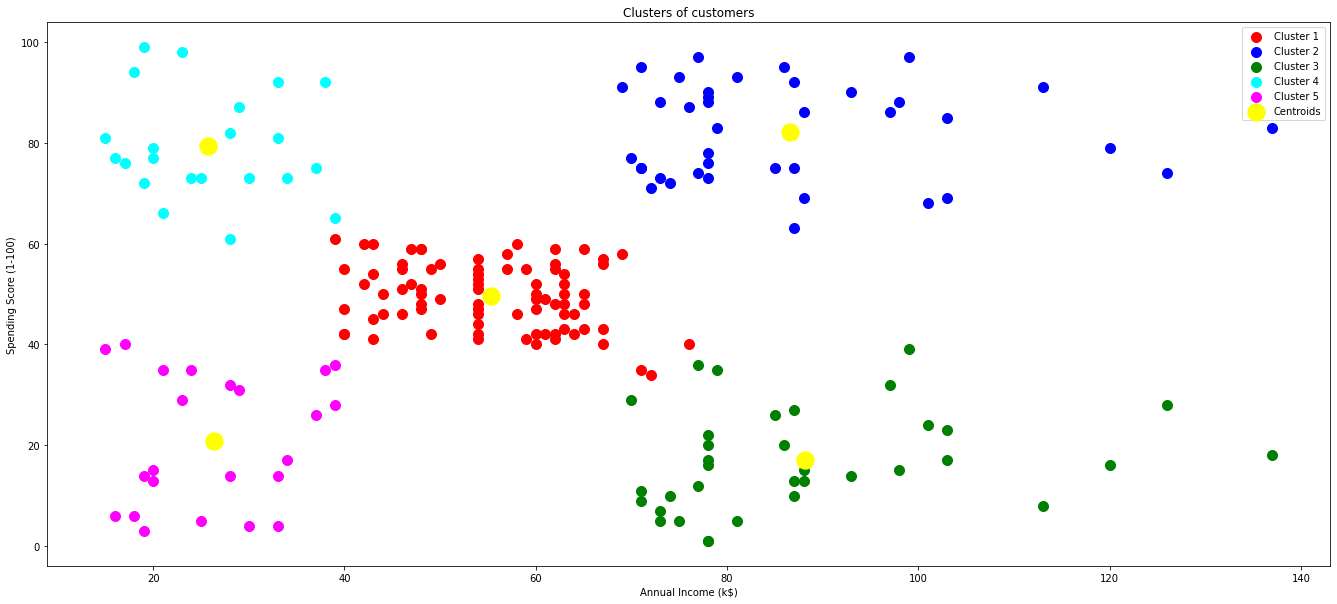

In [35]:
# Visualising the clusters (only for 2D clustering)
plt.figure(figsize=(23,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') #careful
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') #standard
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') #Target
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #careless
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #sensible

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Silhouette_score

In [36]:
from sklearn.metrics import silhouette_score


def getBestCluster(X,_min=2,_max=10):
    selected_cluster = 0
    previous_sil_coeff = 0.001 #some random small number not 0
    sc_vals = []
    for n_cluster in range(_min, _max):
        kmeans = KMeans(n_clusters=n_cluster).fit(X)
        label = kmeans.labels_

        sil_coeff = silhouette_score(X, label, metric='euclidean', sample_size=1000)
        sc_vals.append(sil_coeff)
        print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

        percent_change = (sil_coeff-previous_sil_coeff)*100/previous_sil_coeff

        # return when below a threshold of 1%
        if percent_change<1:
            selected_cluster = n_cluster-1

        previous_sil_coeff = sil_coeff

    return selected_cluster or _max, sc_vals

In [37]:
getBestCluster(X)

For n_clusters=2, The Silhouette Coefficient is 0.2968969162503008
For n_clusters=3, The Silhouette Coefficient is 0.4676135815877543
For n_clusters=4, The Silhouette Coefficient is 0.49319631092490474
For n_clusters=5, The Silhouette Coefficient is 0.553931997444648
For n_clusters=6, The Silhouette Coefficient is 0.53976103063432
For n_clusters=7, The Silhouette Coefficient is 0.5264283703685728
For n_clusters=8, The Silhouette Coefficient is 0.45892295577045006
For n_clusters=9, The Silhouette Coefficient is 0.45841513839373804


(8,
 [0.2968969162503008,
  0.4676135815877543,
  0.49319631092490474,
  0.553931997444648,
  0.53976103063432,
  0.5264283703685728,
  0.45892295577045006,
  0.45841513839373804])